## Histograms

Given data $x_1,...,x_n$ and "bins" $B_k = [u_{k-1}, u_k), k=1,...,m$, then 
$$hist(x)=\frac{1}{n(u_k-u_{k-1})}\sum^n \mathbb I(x_i \in B_k)$$
Note that $hist$ is a pdf since $hist(x)\geq 0$ and 
\begin{align*}
\int_{-\infty}^\infty hist(x)dx &= \sum^m \int_{B_k} hist(x)dx\\
&= n^{-1}\sum^n_{i=1}\sum_{k=1}^m \mathbb I(x_i \in B_k) \int_{B_k} \frac{1}{u_k - u_{k-1}}dx \\
&= 1
\end{align*}
Histogram depends on number of bins and boundaries of the bins. 

## Substitution principle estimation
Consider the empirical distribution function 
$$\hat F(x) = \frac{1}{n}\sum_{i=1}^n \mathbb I(X_i \leq x)$$
However, we cannot derive any $f$ since this is not differentiable. 

### Kernel Density estimation
Start with a density function $w(x)$, i.e. a __kernel__

Given $w$ and a __bandwidth__ $h$, define the kernel density estimator 
$$\hat f_h (x) = \frac{1}{nh}\sum^n w(\frac{x-xX_i}{h})$$
bandwidth controls the amount of smoothing, as $h$ increases, the estimator $\hat f_h(x)$ becomes smoother. 

Some examples of kernels are 
- Gaussian kernel $w(x) = \sqrt{2\pi}^{-1}\exp(\frac{-x^2}{2})$
- Epanechinkov kernel $w(x) = \frac{3}{4\sqrt 5}(1-\frac{x^2}{5}), |x|\leq \sqrt 5$
- Rectangular $w(x) = \frac{1}{2\sqrt{3}}, |x| \leq \sqrt 3$
- Triangular $w(x) = \frac{1}{\sqrt 6}(1-\frac{|x|}{\sqrt 6}), |x|\leq \sqrt 6$

## Example 
Draw 500 observations from 
$$f(x) = \begin{cases}
\sqrt{2\pi}^{-1}\exp(\frac{-(x-2)^2}{2})&k\leq 0.7 \\
\sqrt{2\pi}^{-1}\exp(\frac{-(x+2)^2}{2})&k > 0.7
\end{cases}$$

numeric(0)

numeric(0)

numeric(0)

numeric(0)

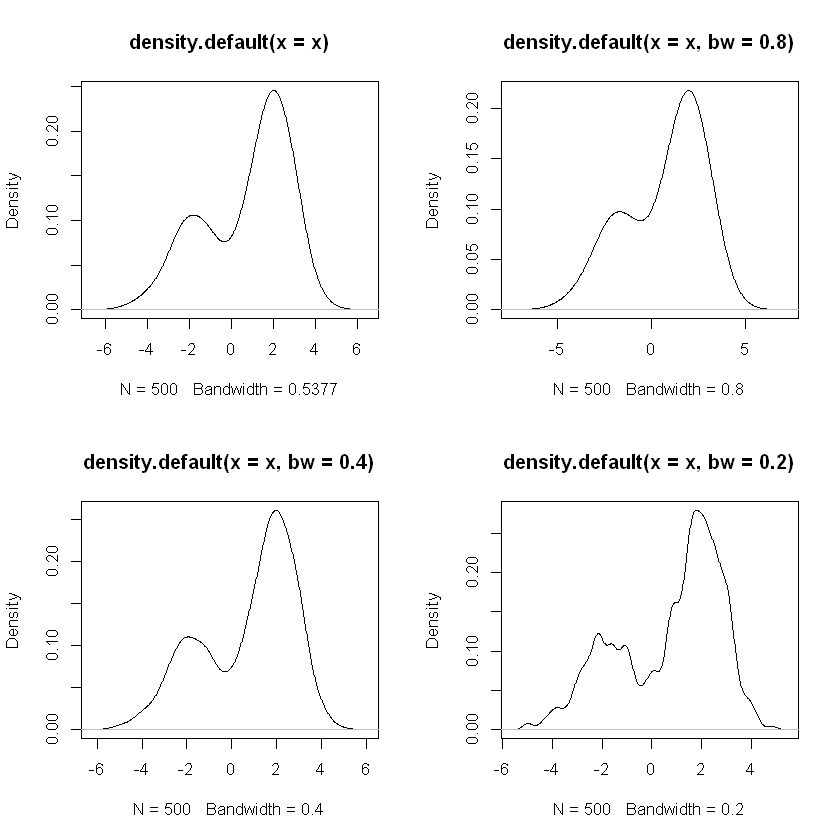

In [22]:
N <- 500
components <- sample(1:2,prob=c(.7, .3),size=N,replace=TRUE)
mus <- c(2, -2)

x <- rnorm(n=N,mean=mus[components],sd=1)
par(mfrow=c(2, 2))
.5387 - plot(density(x))
.8 - plot(density(x, bw=.8))
.4 - plot(density(x, bw=.4))
.2 - plot(density(x, bw=.2))

#### Redistribution
The empirical distribution function $\hat F$ puts probability mass $1/n$ at each of the points $X_1,...,X_n$, use the kernel with bandwidth $h$ to redistribute this mass around each $X_i$, probability density around $X_i = \frac{1}{nh}w(\frac{x-X_i}{h})$ where 
$$\int_{-\infty}^\infty \frac{1}{nh}w(\frac{x-X_i}{h})dx = \frac{1}{n}\int_{-\infty}^\infty w(t)dt = \frac{1}{n}$$
The density estimate is now simply the sum of these densities over all observations 
$$\hat f_h(x) = \frac{1}{nh}\sum_{i=1}^n w(\frac{x-X_i}{h})$$

#### Convolution 
Look at the distribution of $Y_h = U+hV$ where $U\sim \hat F$ and $V$ has density $w$ with $V,U$ independent. If $h$ is small then $Y_h \approx U \sim \hat F$. 

Unlike $U, Y_h$ is a continuous r.v. for each $h>0$: 
\begin{align*}
P(Y_h\leq x) &= \sum_{i=1}^n P(U+hV\leq x \mid U = X_i)\underset{=1/n}{P(U=X_i)}\\
&= \frac{1}{n}\sum_{i=1}^n P(hV\leq x-X_i) &U,V\text{ indep.}\\
&= \frac{1}{n}\sum_{i=1}^n P(V\leq \frac{x-X_i}{h})
\end{align*}